**Trabajo Practico FInal**

**Ciencia de Datos - Ingenieria Industrial UTN BA**

**Curso I5521**

**Machine Learning enfocado a la predicción de Churn**

**Elaborado por: Jaider Saavedra y Agustin Schiliro**

#Herramientas EDA

In [ ]:
#Importar paquetes de herramientas:
#Datos
import pandas as pd
import numpy as np
#Graficos
import matplotlib.pyplot as plt
import seaborn as sns
#Otros
import warnings
warnings.filterwarnings('ignore')


# Dataset

#Pre-procesamiento de Datos

**EDA**


El **Dataset**  que usaremos fue proporcionado en el marco de la materia de **Ciencia de Datos** por el equipo de **ClusterIA de la UTN-Facultad regional Buenos Aires.**

In [ ]:
# Ingresamos el Dataset desde Google_Drive usando la función de Google Colab

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargamos el Dataset en la variable 'dataframe'
path_to_csv = r'/content/drive/My Drive/Trabajo_Practico_Final/telco_churn_clusterai.csv'
try:
  df= pd.read_csv(path_to_csv)
except:
  print("Por favor ajuste el path a telco_churn_clusterai.csv")

# Realizamos un output de las primeras 5 'filas de dataframe' para visualizar como se cargó nuestro dataset
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,7590-VHVEG,Female,NaN,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,NaN,Electronic check,29.85,29.85,No
1,1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,NaN,...,Yes,No,No,No,One year,No,Mailed check,NaN,1889.5,No
2,2,3668-QPYBK,Male,0.0,No,No,2.0,NaN,No,NaN,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,3,7795-CFOCW,Male,0.0,No,No,NaN,No,NaN,NaN,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,4,9237-HQITU,Female,NaN,NaN,NaN,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,151.65,Yes


In [ ]:

#Aplicamos un .drop_duplicates para eliminar los Samples REPETIDOS del campo 'customerID'
df.drop_duplicates(subset='customerID', inplace=True, keep='first')
# Dimesionamos el Dataframe
df.shape

(7043, 22)

In [ ]:
df.info()
#Como podemos ver, más de una variable tiene valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        7043 non-null   int64  
 1   customerID        7043 non-null   object 
 2   gender            6127 non-null   object 
 3   SeniorCitizen     6127 non-null   float64
 4   Partner           6127 non-null   object 
 5   Dependents        6127 non-null   object 
 6   tenure            6127 non-null   float64
 7   PhoneService      6127 non-null   object 
 8   MultipleLines     6127 non-null   object 
 9   InternetService   6127 non-null   object 
 10  OnlineSecurity    6127 non-null   object 
 11  OnlineBackup      6127 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          5846 non-null   object 


In [ ]:
# Observamos dos columnas que no aportan información: 'Unnamed:0' y customerID.
# Eliminamos 'Unnamed: 0' con un drop y volvemos indice a customerID
path_to_csv = r'/content/drive/My Drive/Trabajo_Practico_Final/telco_churn_clusterai.csv'
try:
  df= pd.read_csv(path_to_csv,index_col='customerID')
except:
  print("Por favor ajuste el path a telco_churn_clusterai.csv")

df.drop('Unnamed: 0', axis=1, inplace=True)
df.tail()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6840-RESVB,Male,0.0,Yes,Yes,24.0,Yes,Yes,DSL,NaN,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,NaN,1990.5,No
2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,NaN,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0.0,Yes,Yes,11.0,No,No phone service,DSL,Yes,No,No,No,No,No,NaN,Yes,Electronic check,29.60,346.45,No
8361-LTMKD,Male,1.0,Yes,No,NaN,NaN,Yes,Fiber optic,No,NaN,No,No,No,No,Month-to-month,Yes,NaN,74.40,306.6,Yes
3186-AJIEK,NaN,0.0,NaN,No,66.0,NaN,No,Fiber optic,Yes,NaN,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
# Vemos que TotalCharges es un object cuando en el csv debería ser float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verificar la conversión
print(df['TotalCharges'].dtype)  # Debería mostrar float64
print(df['TotalCharges'].isnull().sum())  # Número de valores convertidos a NaN

float64
11


In [ ]:
# Usamos la funcion .isnull().sum() para identificar cantidad de valores null por campo
df.isnull().sum().sort_values(ascending=False)

,0
PaperlessBilling,1197
MonthlyCharges,1197
PaymentMethod,1197
Contract,1197
gender,916
Partner,916
Dependents,916
tenure,916
PhoneService,916
MultipleLines,916


In [ ]:
#Aplicamos un .dropna() para eliminar los Samples con valores Null
df2= df.dropna().copy()

# Dimesionamos el Dataframe
df2.shape


(844, 20)

In [ ]:
#Como podemos ver, el dataframe pasa de 7043 a 844 filas. Vamos a utilizar otros métodos que no impliquen eliminar NaN
#Notamos que los campos K-P del dataframe tienen un patrón: siempre que alguno de sus valores es "No internet service", se arrastra a las 6 columnas
#Vamos a intentar llenar los espacios en blanco de estas celdas siempre que encuentre el valor "No internet service" en sus columnas vecinas

patron_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies']

def conditional_impute(row, target_col, patron_cols):
    if pd.isnull(row[target_col]):
        # Verificar si alguna de las columnas relacionadas tiene 'No internet service'
        if any(row[col] == 'No internet service' for col in patron_cols):
            return 'No internet service'
        else:
            return np.nan
    else:
        return row[target_col]

# Aplicar la imputación condicional a cada columna relacionada
for col in patron_cols:
    df[col] = df.apply(lambda row: conditional_impute(row, col, patron_cols), axis=1)

# Verificar si quedan valores faltantes en las columnas relacionadas
print(df[patron_cols].isnull().sum())

OnlineSecurity      722
OnlineBackup        738
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
dtype: int64


In [ ]:
#Como se puede observar, pasamos de 916 celdas vacías en OnlineSecurity/Backup a 722 y 738
#En vez de limpiar todas las filas que tengan 1 celda vacía, vamos a jugar con la cantidad de celdas vacías permitidas

In [ ]:
#Notamos además que si alguna de las columnas K-P es "No internet service", será InternetService = "No".


def update_internet_service(df):
    df.loc[df['OnlineSecurity'] == 'No internet service', 'InternetService'] = 'No'
    return df

df = update_internet_service(df)
print(df['InternetService'].isnull().sum())

733


In [ ]:
#Identificamos un patrón con PhoneService y MultipleLines.
#Si PhoneService = "No" <-> MultipleLines = "No phone service"
#Si PhoneService = "Yes" --> MultipleLines = "Yes"/"No"
#También encontramos un patrón con el servicio de internet. Siempre que es fibra optica, PhoneService = "Yes"

def update_phone_service(df):
    df.loc[df['MultipleLines'] == 'No phone service', 'PhoneService'] = 'No'
    df.loc[df['MultipleLines'].isin(['Yes', 'No']), 'PhoneService'] = 'Yes'
    df.loc[df['PhoneService'] == 'No', 'MultipleLines'] = 'No phone service'
    df.loc[df['InternetService'] == 'Fiber optic', 'PhoneService'] = 'Yes'

    return df

# Aplicar la función al DataFrame
df = update_phone_service(df)
print(df[['PhoneService','MultipleLines']].isnull().sum())

PhoneService      85
MultipleLines    841
dtype: int64


In [ ]:
#Dividiremos las variables entre numéricas y categóricas

categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling','PaymentMethod'
]

numerical_cols = [
    'tenure', 'MonthlyCharges', 'TotalCharges'
]


In [ ]:
#Describiremos las variables numéricas
print(df[numerical_cols].describe())

            tenure  MonthlyCharges  TotalCharges
count  6127.000000     5846.000000   7032.000000
mean     32.539742       64.658655   2283.300441
std      24.629822       30.046041   2266.771362
min       0.000000       18.700000     18.800000
25%       9.000000       35.400000    401.450000
50%      29.000000       70.375000   1397.475000
75%      56.000000       89.687500   3794.737500
max      72.000000      118.750000   8684.800000


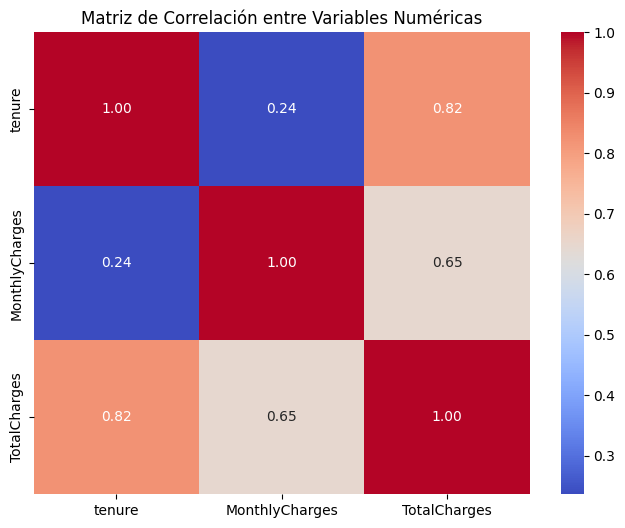

In [ ]:
#Identificamos un patrón entre las columnas tenure, monthly charges y total charges.
#Podemos ver que tenure * monthly charge = total charge (aproximadamente)
#Vamos a primero analizar la correlación entre las variables. Si existe, procederemos con un KNN

# Calcular la matriz de correlación
corr_matrix = df[numerical_cols].corr(method='pearson')  # Puedes usar 'spearman' o 'kendall' si es más apropiado

# Visualizar la matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

In [ ]:
from sklearn.impute import KNNImputer

# Aplicamos Knn
imputer_knn = KNNImputer(n_neighbors=5)
df[numerical_cols] = imputer_knn.fit_transform(df[numerical_cols])


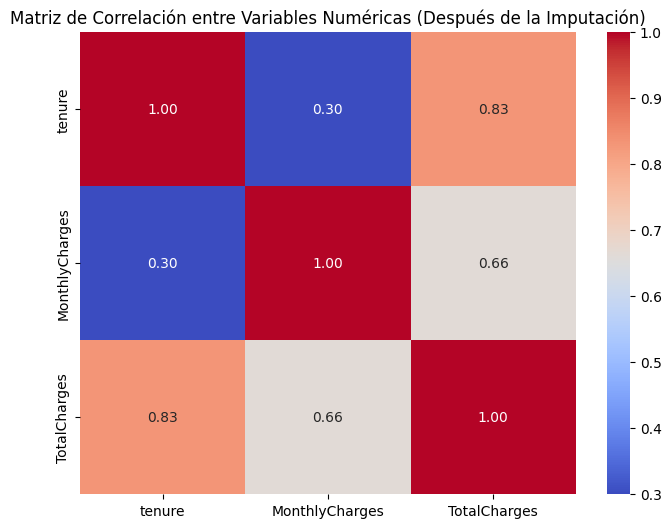

In [ ]:
# Recalculamos la matriz de correlación para verificar que los valores sean similares a los primeros
corr_matrix_after = df[numerical_cols].corr(method='pearson')

# Visualizamos la nueva matriz de correlación
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix_after, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas (Después de la Imputación)')
plt.show()


In [ ]:
#Como podemos observar, los valores son similares, por lo que conservaremos esta aplicación

In [ ]:
#Analizaremos la cantidad de valores nulos que tenemos luego de agregar estos datos
df.isnull().sum().sort_values(ascending=False)


,0
Contract,1197
PaymentMethod,1197
PaperlessBilling,1197
gender,916
Partner,916
Dependents,916
SeniorCitizen,916
MultipleLines,841
OnlineBackup,738
InternetService,733


**Observación**
En total son 10.374 nulos. Implica una reducción del 25% respecto al valor original (13.959).


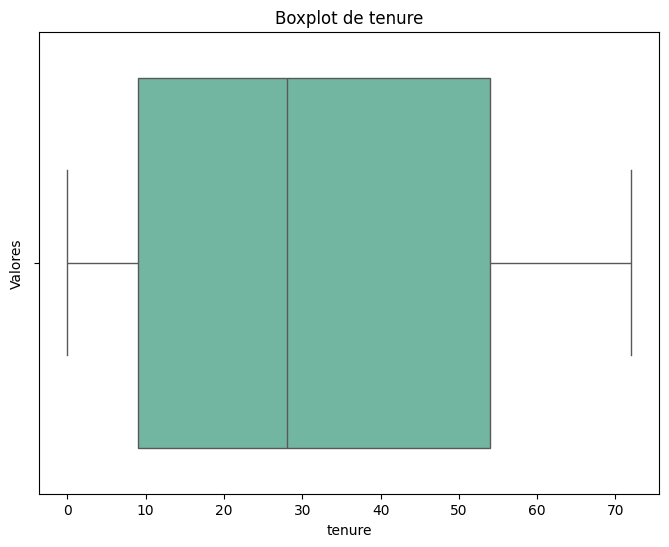

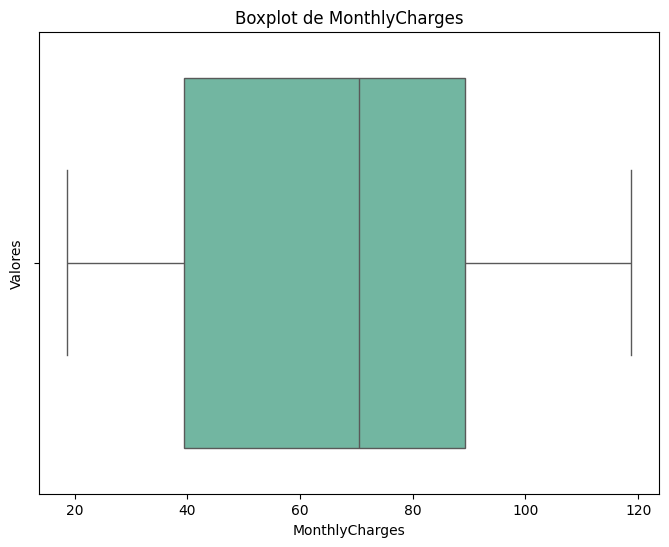

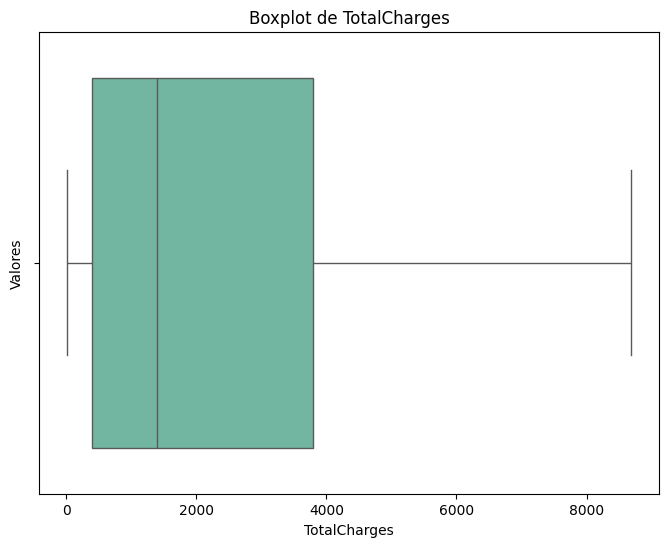

In [ ]:
#Vamos a trabajar ahora en el manejo de outliers
#Armaremos Boxplots para detectar outliers
for col in numerical_cols:
        plt.figure(figsize=(8,6))
        sns.boxplot(x=df[col], palette="Set2")
        plt.title(f'Boxplot de {col}')
        plt.xlabel(col)
        plt.ylabel('Valores')
        plt.show()


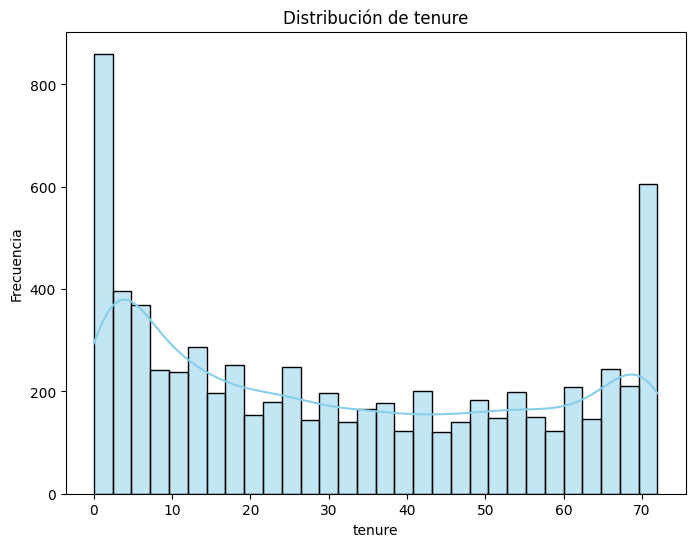

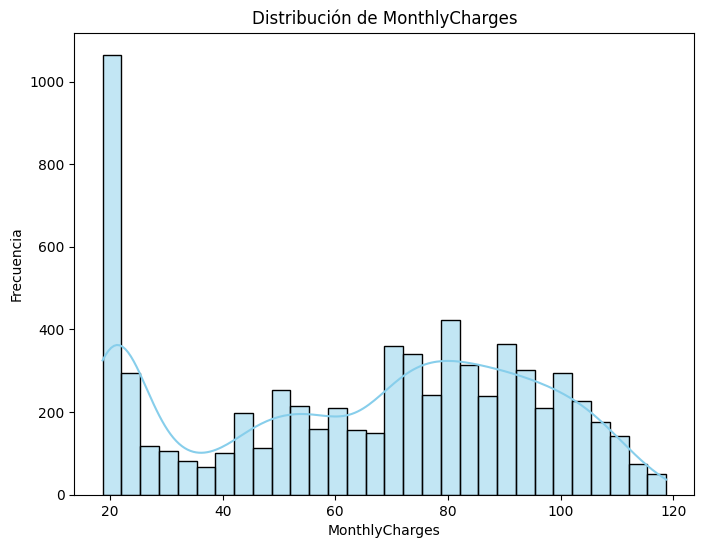

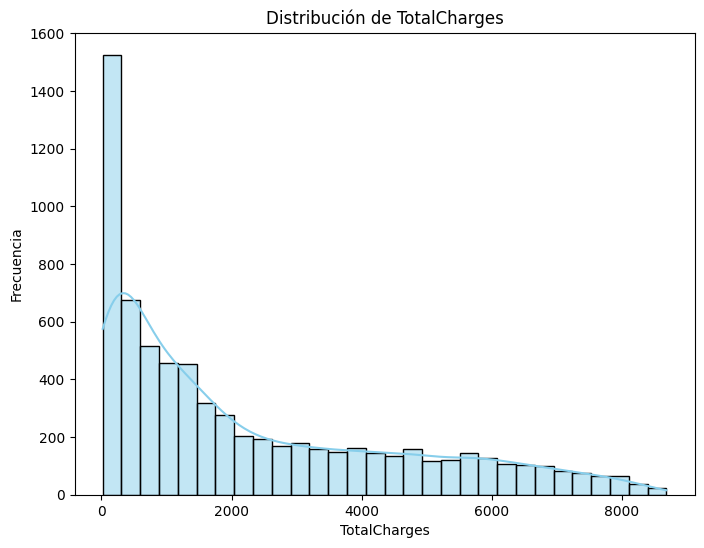

In [ ]:
#Verificaremos las frecuencias tambien

for col in numerical_cols:
    plt.figure(figsize=(8,6))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [ ]:
#Hacemos un .describe() para verificar los datos anteriores
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,31.846372,64.957160,2281.154586
std,24.343004,29.385418,2265.807678
min,0.000000,18.700000,18.800000
25%,9.000000,39.400000,401.675000
50%,28.000000,70.400000,1396.250000
75%,54.000000,89.350000,3786.600000
max,72.000000,118.750000,8684.800000


**Observaciones de los gráficos**

Tenure sigue una distribución uniforme, mientras que las otras dos tienen picos al principio. Además hay picos de usuarios nuevos y antiguos.

En cuanto al cargo mensual, la distribución muestra un pico al principio. Esto puede responder a que la gran mayoría de los usuarios utiliza suscripciones base de $20.


In [ ]:
#Comenzaremos a trabajar las variables categóricas
#Función para mostrar conteo y porcentaje
def categorical_summary(df, cols):
    for col in cols:
        print(f"\nDistribución de '{col}':")
        counts = df[col].value_counts()
        percentages = df[col].value_counts(normalize=True) * 100
        summary = pd.concat([counts, percentages], axis=1, keys=['Conteo', 'Porcentaje'])
        print(summary)

print("\nResumen de Variables Categóricas:")
categorical_summary(df, categorical_cols)


Resumen de Variables Categóricas:

Distribución de 'gender':
        Conteo  Porcentaje
gender                    
Male      3082   50.301942
Female    3045   49.698058

Distribución de 'SeniorCitizen':
               Conteo  Porcentaje
SeniorCitizen                    
0.0              5137   83.842011
1.0               990   16.157989

Distribución de 'Partner':
         Conteo  Porcentaje
Partner                    
No         3172    51.77085
Yes        2955    48.22915

Distribución de 'Dependents':
            Conteo  Porcentaje
Dependents                    
No            4294   70.083238
Yes           1833   29.916762

Distribución de 'PhoneService':
              Conteo  Porcentaje
PhoneService                    
Yes             6289   90.385168
No               669    9.614832

Distribución de 'MultipleLines':
                  Conteo  Porcentaje
MultipleLines                       
No                  2954   47.629797
Yes                 2579   41.583360
No phone service  

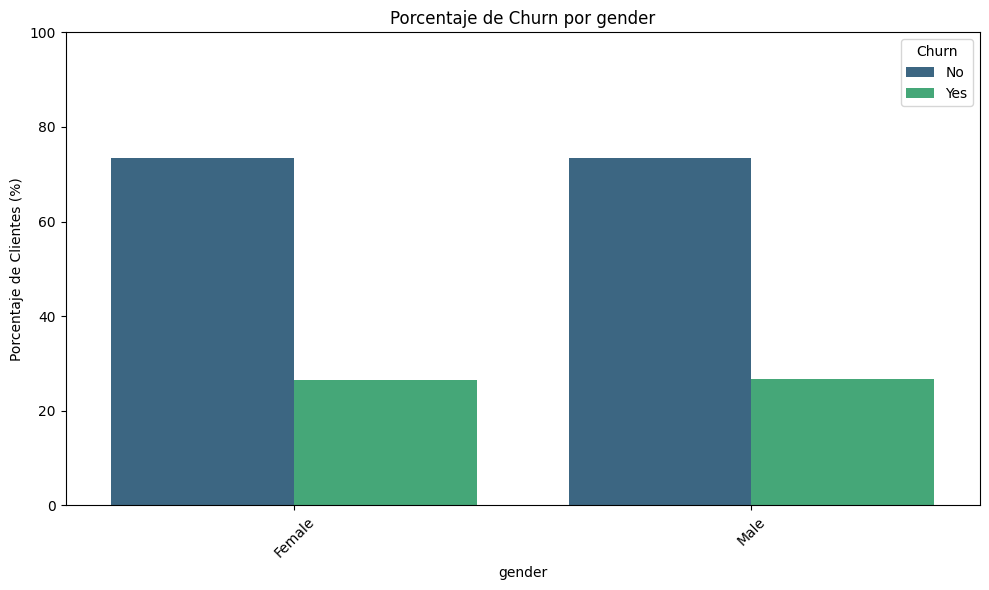

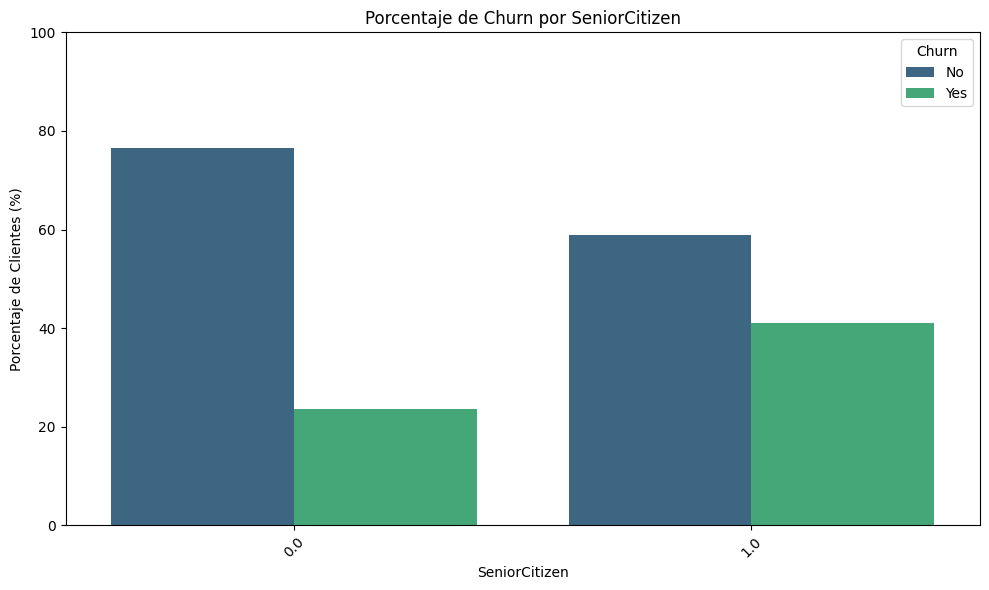

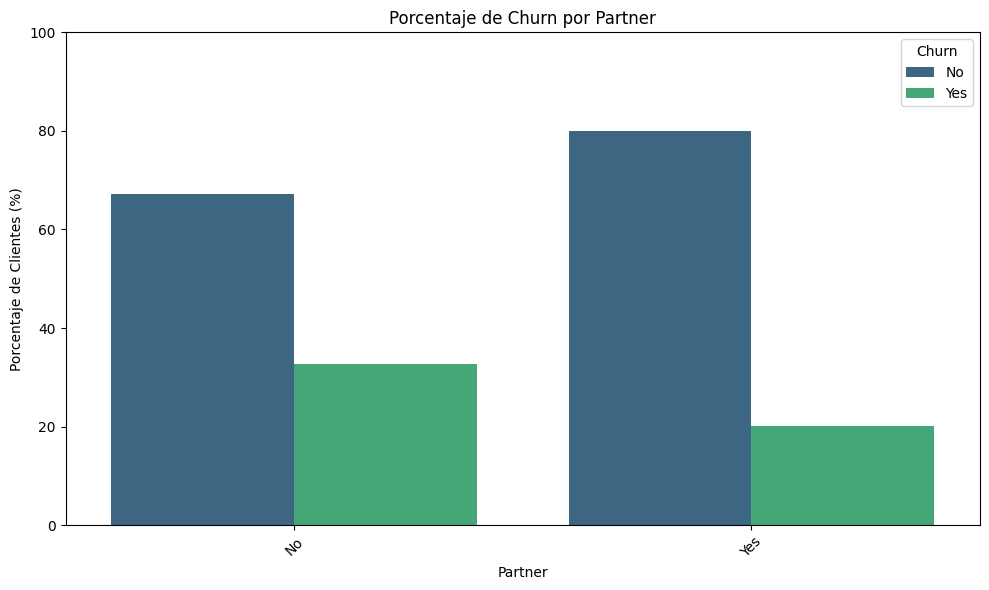

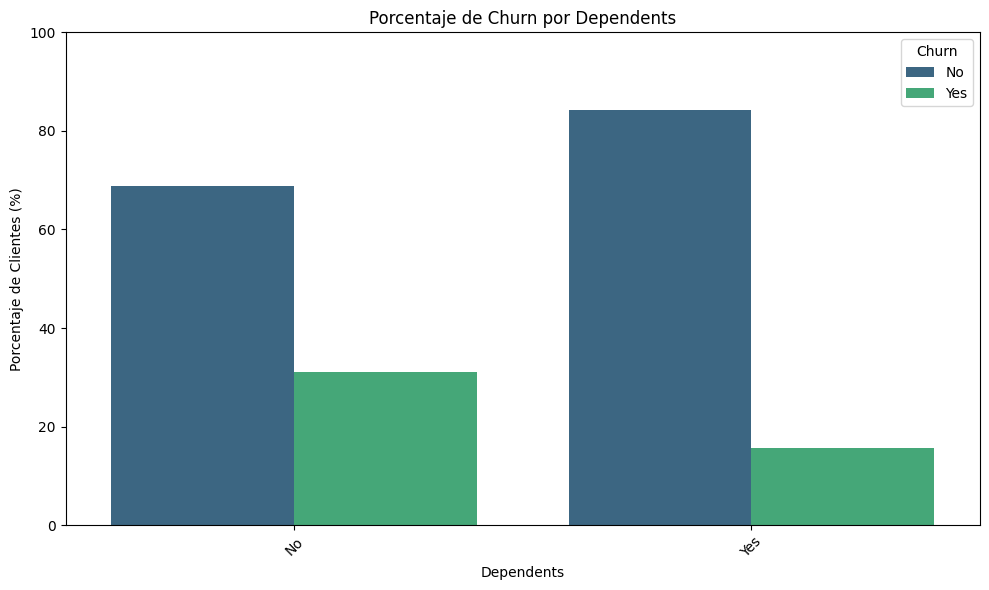

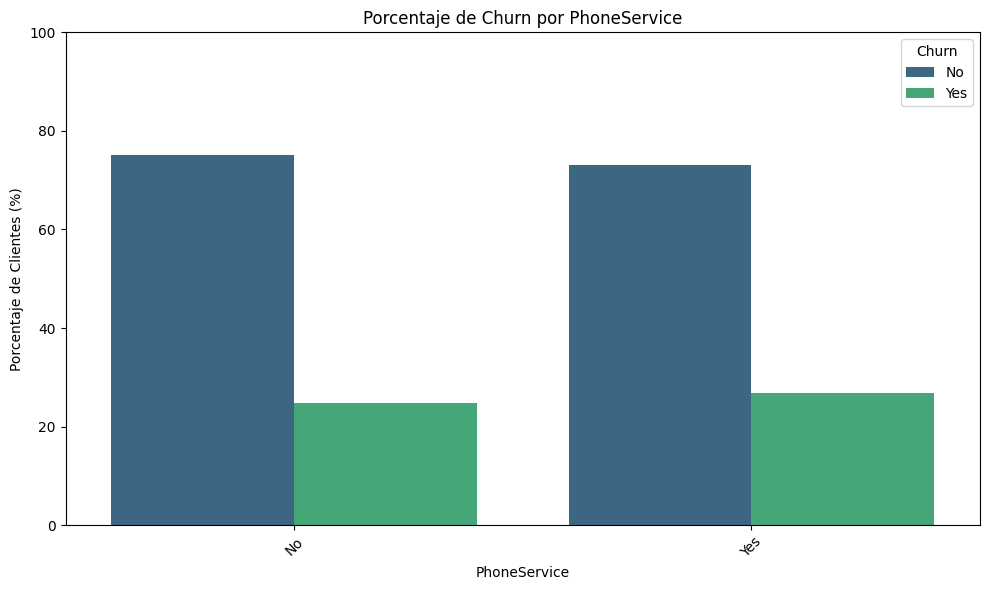

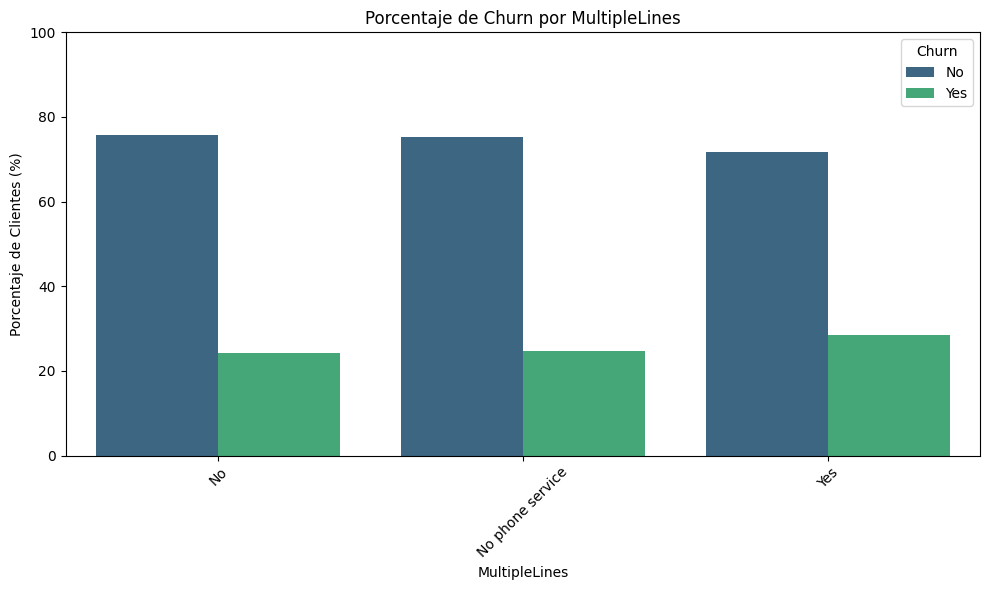

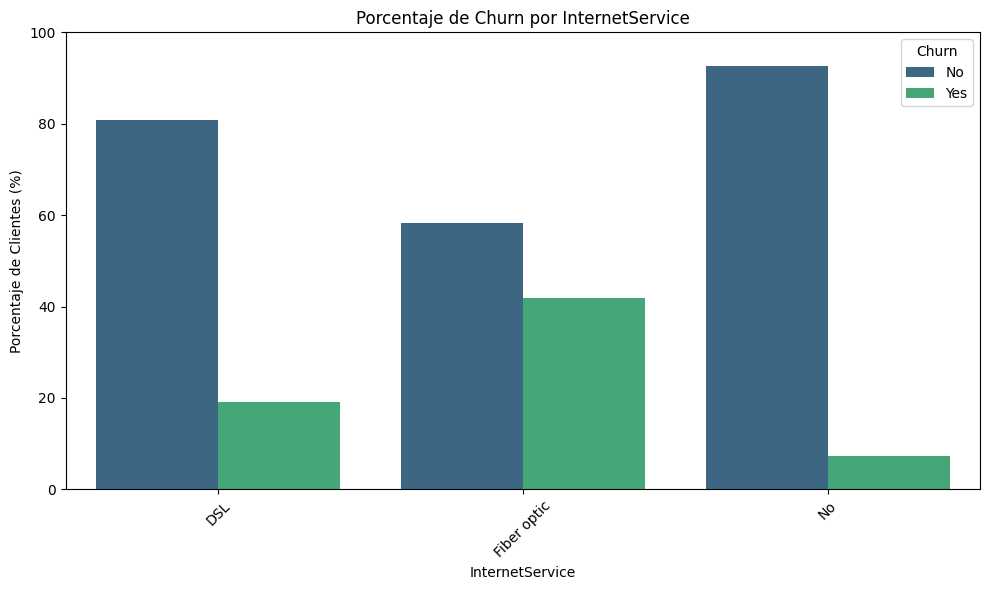

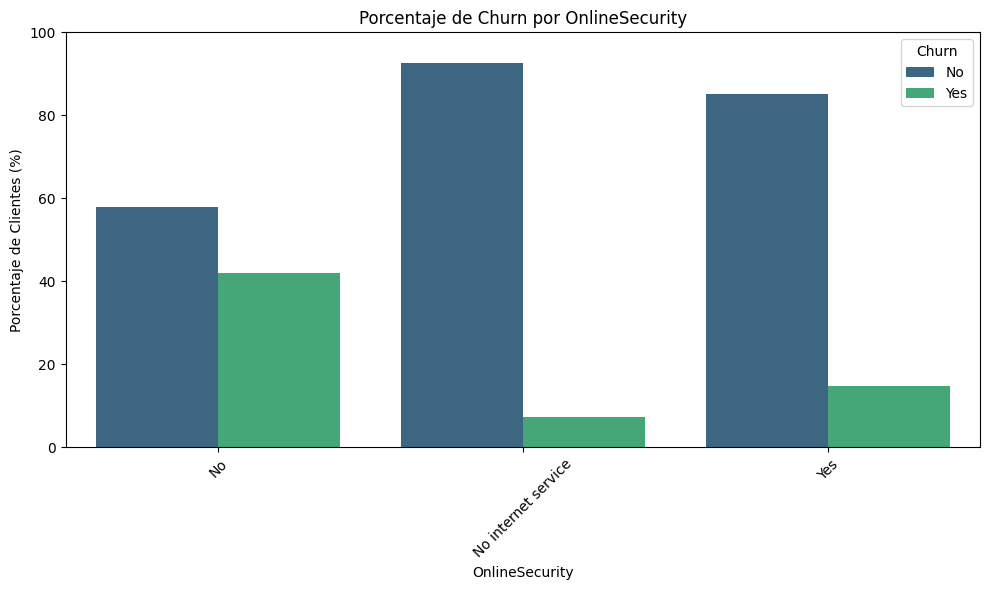

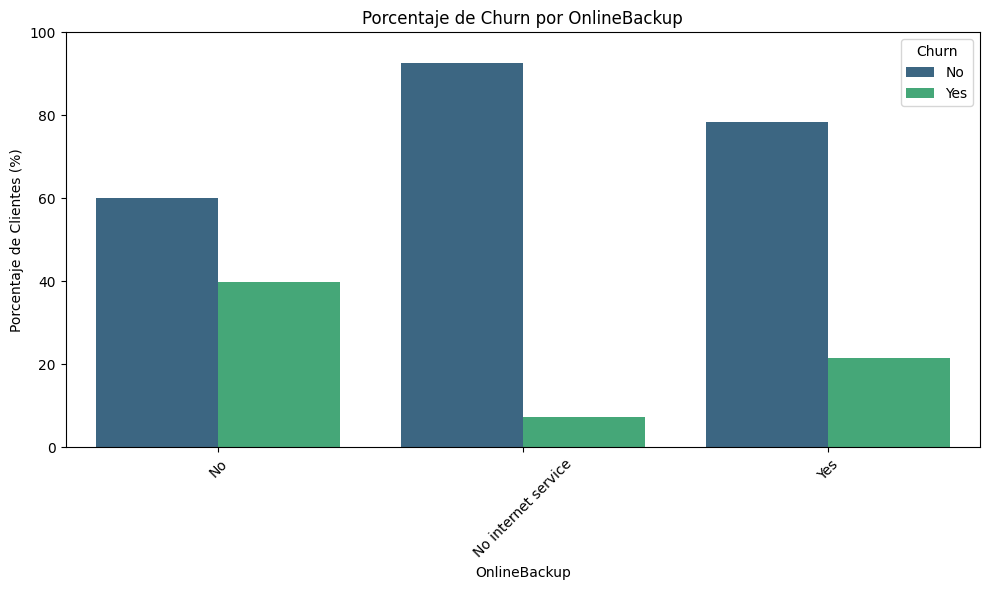

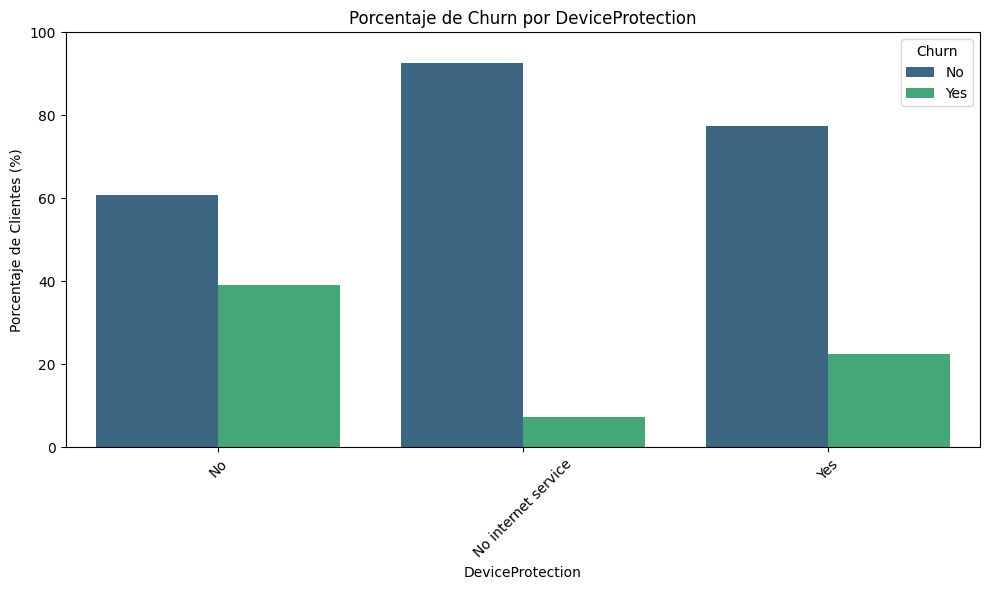

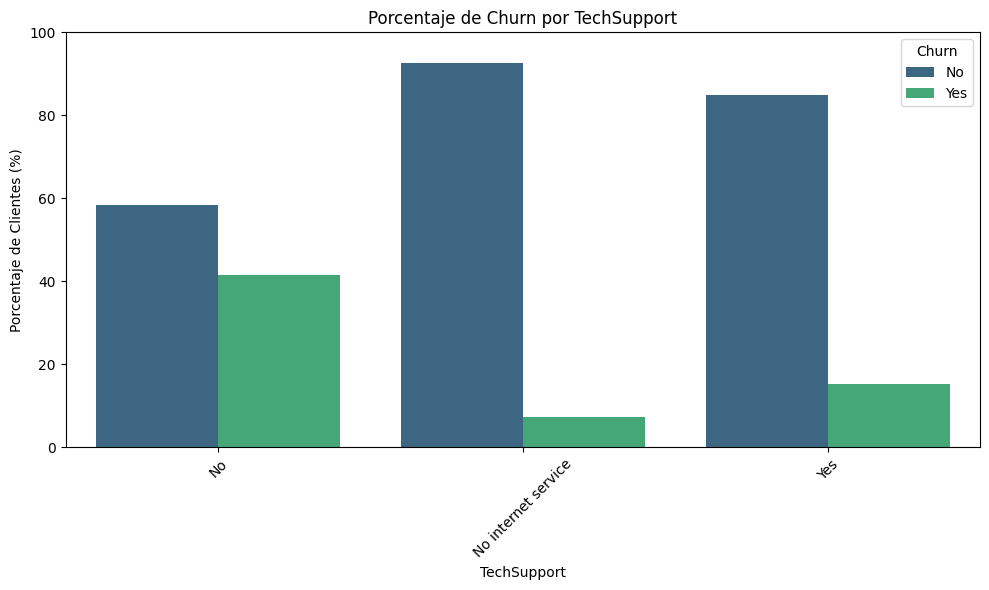

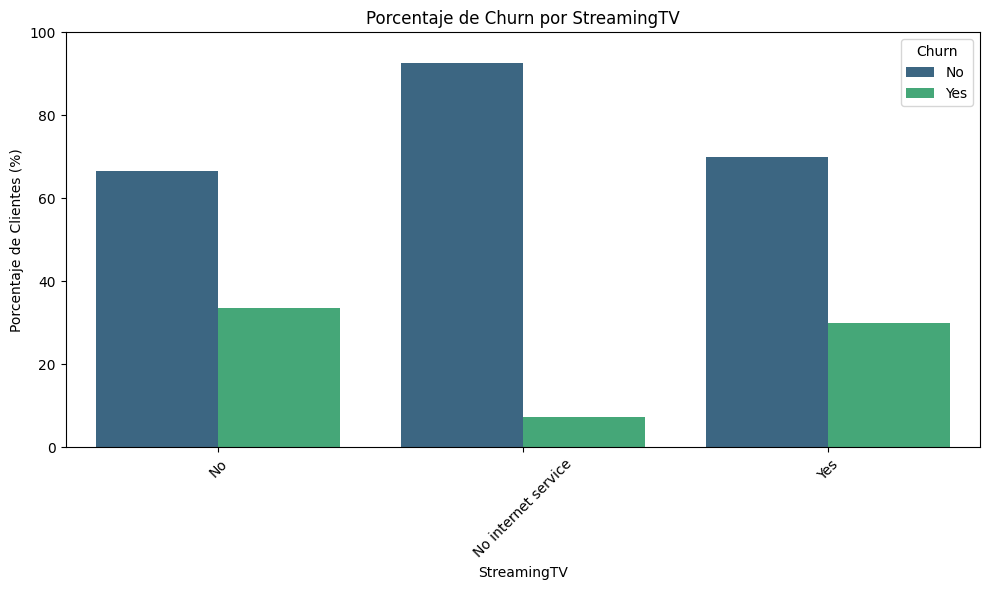

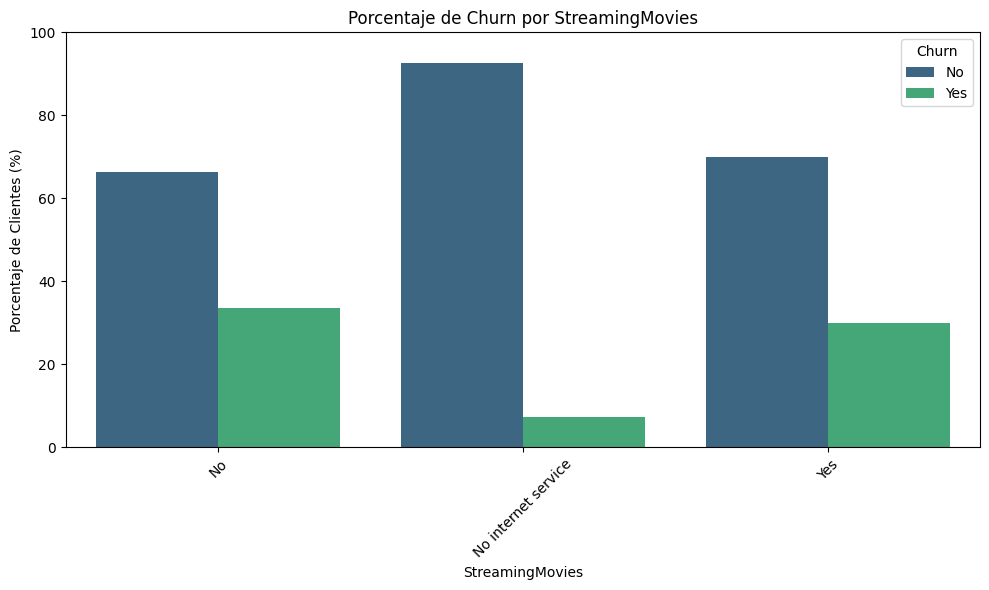

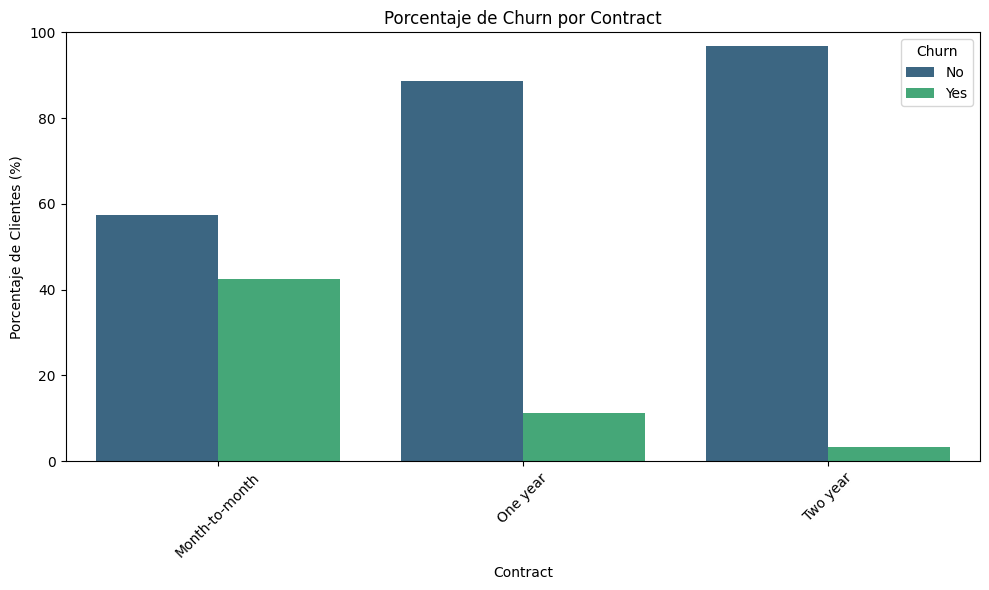

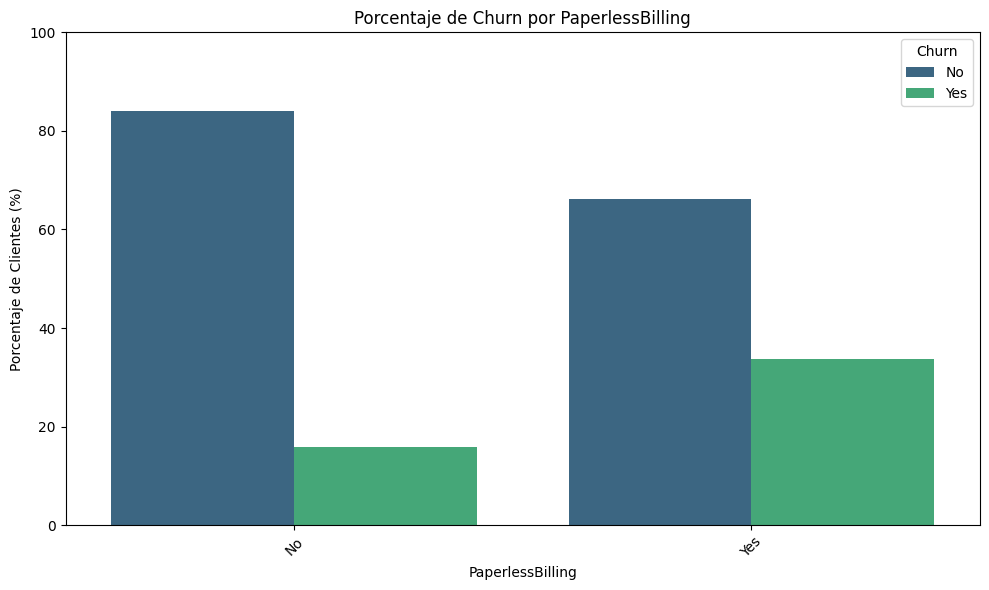

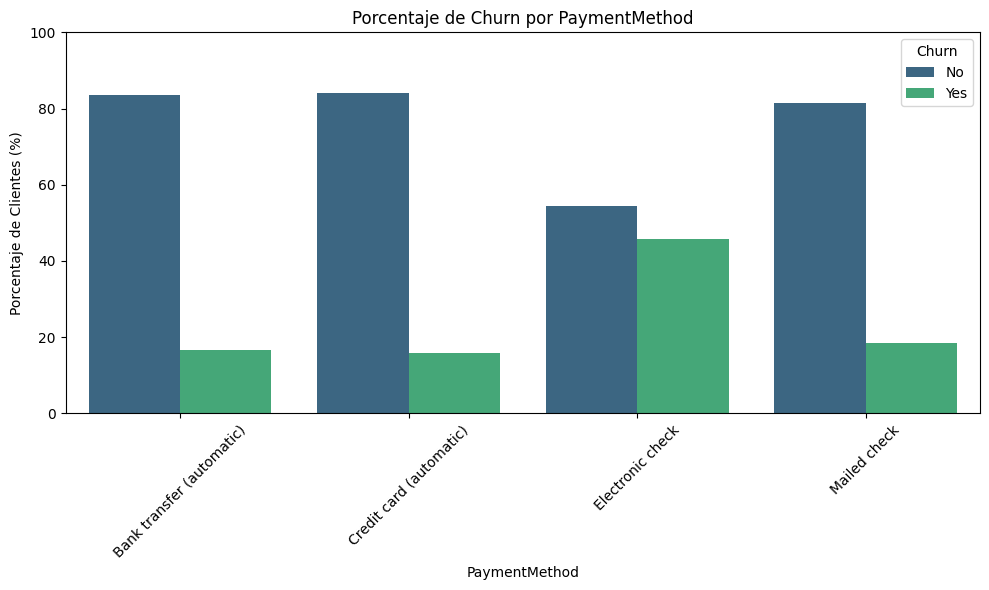

In [ ]:
#Vamos a analizarlas en función de Churn
#Utilizaremos gráficos de barras, e implementaremos una función para acelerar el proceso
#En vez de usar valores absolutos, optamos por % para que el análisis sea más preciso

#Nota! Por una advertencia, esta sección se debe ejecutar 2 veces

def plot_churn_percentage(df, categorical_cols):
       for col in categorical_cols:
        # Calcular la frecuencia de cada categoría de Churn dentro de cada categoría de 'col'
        churn_counts = pd.crosstab(df[col], df['Churn'])
        churn_percentage = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100

        # Asegurarse de que ambas columnas 'No' y 'Yes' estén presentes
        for churn_category in ['No', 'Yes']:
            if churn_category not in churn_percentage.columns:
                churn_percentage[churn_category] = 0.0

        # Ordenar las columnas para mantener consistencia
        churn_percentage = churn_percentage[['No', 'Yes']]

        # Resetear el índice para facilitar el plotting con seaborn
        churn_percentage = churn_percentage.reset_index()

        # Convertir el DataFrame a formato 'long' para seaborn
        churn_melted = churn_percentage.melt(id_vars=col, value_vars=['No', 'Yes'], var_name='Churn', value_name='Percentage')

        # Plotear
        plt.figure(figsize=(10,6))
        sns.barplot(x=col, y='Percentage', hue='Churn', data=churn_melted, palette='viridis')
        plt.title(f'Porcentaje de Churn por {col}')
        plt.xlabel(col)
        plt.ylabel('Porcentaje de Clientes (%)')
        plt.legend(title='Churn')
        plt.ylim(0, 100)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

plot_churn_percentage(df, categorical_cols)

***Análisis de los gráficos***

Podemos observar que la diferencia en las tasas de churn en las variables gender, PhoneService y MultipleLines es mínima. Por ello consideramos que estas variables no son relevantes para el modelo.

Además, observamos similitudes importantes en distintos grupos de variables.
Por ejemplo, Partner y Dependents muestran distribuciones muy similares, por lo que nos quedaremos con Partner. Lo mismo sucede con StreamingTV y StreamingMovies.

El grupo OnlineSecurity - OnlineBackup - DeviceProtection - TechSupport muestra el mismo patrón, por lo que nos quedaremos con OnlineSecurity.

En InternetService observamos una mayor tasa de deserción para los usuarios de fibra óptica.

Para el mix de OnlineSecurity, vemos que los usuarios que no lo tienen contratado tienen mayor probabilidad de abandonar el servicio.

En cuanto a los contratos, observamos que los usuarios que pagan mes a mes tienen una tasa de deserción muchísimo mayor a los que contratan por 1 o 2 años.

Finalmente, el cheque electrónico se postula como el método de pago de mayor abandono respecto a sus pares, los cuales se encuentran equilibrados.



In [ ]:
#Procedemos a eliminar las variables que consideramos que estorban

variables_a_eliminar = ['gender', 'PhoneService', 'MultipleLines', 'Dependents', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingMovies']
df = df.drop(variables_a_eliminar, axis=1)
df.columns.tolist()

['SeniorCitizen',
 'Partner',
 'tenure',
 'InternetService',
 'OnlineSecurity',
 'StreamingTV',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [ ]:
# Definimos el umbral con 12 valores no null e iremos reduciendolo para ver cant. de samples con (x) null
umbral = 12

# Aplicar dropna() con el umbral definido
df_limpio0 = df.dropna(thresh=umbral)
df_limpio1 = df.dropna(thresh=umbral-1)
df_limpio2 = df.dropna(thresh=umbral-2)
df_limpio3 = df.dropna(thresh=umbral-3)
df_limpio4 = df.dropna(thresh=umbral-4)
df_limpio5 = df.dropna(thresh=umbral-5)

# Verificar la cantidad de samples antes y después
print(f"Cantidad de samples del dataframe sin features Nan: {df_limpio0.shape[0]}")
print(f"Cantidad de samples del dataframe con un máximo de 1 features Nan: {df_limpio1.shape[0]}")
print(f"Cantidad de samples del dataframe con un máximo de 2 features Nan: {df_limpio2.shape[0]}")
print(f"Cantidad de samples del dataframe con un máximo de 3 features Nan: {df_limpio3.shape[0]}")
print(f"Cantidad de samples del dataframe con un máximo de 4 features Nan: {df_limpio4.shape[0]}")
print(f"Cantidad de samples del dataframe con un máximo de 5 features Nan: {df_limpio5.shape[0]}")
print(f"samples originales: {df.shape[0]}")

Cantidad de samples del dataframe sin features Nan: 2449
Cantidad de samples del dataframe con un máximo de 1 features Nan: 5241
Cantidad de samples del dataframe con un máximo de 2 features Nan: 6625
Cantidad de samples del dataframe con un máximo de 3 features Nan: 6988
Cantidad de samples del dataframe con un máximo de 4 features Nan: 7034
Cantidad de samples del dataframe con un máximo de 5 features Nan: 7043
samples originales: 7043


In [ ]:
#Procederemos a borrar los samples que tengan más de 3 features nulos
df = df_limpio3
df.shape

(6988, 12)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
#Ahora llenaremos las variables categóricas utilizando sus respectivas modas

# Inicializar los imputadores
categorical_imputer = SimpleImputer(strategy='most_frequent')

categorical_cols2 = [
    'SeniorCitizen', 'Partner', 'InternetService', 'OnlineSecurity',
    'StreamingTV', 'Contract', 'PaperlessBilling','PaymentMethod'
]

# Imputar las columnas categóricas con la moda
df[categorical_cols2] = categorical_imputer.fit_transform(df[categorical_cols2])


# Verificar que no queden valores faltantes
print("Valores faltantes por columna después de la imputación:")
print(df[categorical_cols2 + numerical_cols].isnull().sum())

Valores faltantes por columna después de la imputación:
SeniorCitizen       0
Partner             0
InternetService     0
OnlineSecurity      0
StreamingTV         0
Contract            0
PaperlessBilling    0
PaymentMethod       0
tenure              0
MonthlyCharges      0
TotalCharges        0
dtype: int64


# Procesamiento de Datos

**Variables Dummies y Binarias**

In [ ]:
#Procedemos a trabajar las categóricas, comenzando por las binarias

In [ ]:
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

df.head()

,SeniorCitizen,Partner,tenure,InternetService,OnlineSecurity,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,
7590-VHVEG,0.0,1,1.0,DSL,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
5575-GNVDE,0.0,0,34.0,Fiber optic,Yes,No,One year,0,Mailed check,64.49,1889.50,0
3668-QPYBK,0.0,0,2.0,Fiber optic,Yes,No,Month-to-month,1,Mailed check,53.85,108.15,1
7795-CFOCW,0.0,0,45.0,Fiber optic,Yes,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,0.0,0,2.0,Fiber optic,No,No,Month-to-month,1,Electronic check,72.24,151.65,1


In [ ]:
#Vamos a aplicar One-Hot Encoding para variables multicategoría
cols_para_dummies = [
    'InternetService', 'OnlineSecurity', 'StreamingTV', 'Contract', 'PaymentMethod'
]

# Aplicar One-Hot Encoding
df = pd.get_dummies(df, columns=cols_para_dummies, drop_first=True)
df.head()

,SeniorCitizen,Partner,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,0.0,1,1.0,1,29.85,29.85,0,False,False,False,False,False,False,False,False,False,True,False
5575-GNVDE,0.0,0,34.0,0,64.49,1889.50,0,True,False,False,True,False,False,True,False,False,False,True
3668-QPYBK,0.0,0,2.0,1,53.85,108.15,1,True,False,False,True,False,False,False,False,False,False,True
7795-CFOCW,0.0,0,45.0,0,42.30,1840.75,0,True,False,False,True,False,False,True,False,False,False,False
9237-HQITU,0.0,0,2.0,1,72.24,151.65,1,True,False,False,False,False,False,False,False,False,True,False


In [ ]:
df.tail()

,SeniorCitizen,Partner,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,
6840-RESVB,0.0,1,24.0,1,70.10,1990.50,0,False,False,False,False,False,True,True,False,False,False,True
2234-XADUH,0.0,1,72.0,1,103.20,7362.90,0,True,False,False,False,False,True,True,False,True,False,False
4801-JZAZL,0.0,1,11.0,1,29.60,346.45,0,False,False,False,True,False,False,False,False,False,True,False
8361-LTMKD,1.0,1,4.2,1,74.40,306.60,1,True,False,False,False,False,False,False,False,False,True,False
3186-AJIEK,0.0,0,66.0,1,105.65,6844.50,0,True,False,False,True,False,True,False,True,False,False,False


In [ ]:
dummy_cols=['InternetService_Fiber optic','InternetService_No','OnlineSecurity_No internet service','OnlineSecurity_Yes','StreamingTV_No internet service','StreamingTV_Yes',
              'Contract_One year','Contract_Two year','PaymentMethod_Credit card (automatic)','PaymentMethod_Electronic check','PaymentMethod_Mailed check']
df[dummy_cols] = df[dummy_cols].replace({True: 1, False: 0})
df.head()

,SeniorCitizen,Partner,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,0.0,1,1.0,1,29.85,29.85,0,0,0,0,0,0,0,0,0,0,1,0
5575-GNVDE,0.0,0,34.0,0,64.49,1889.50,0,1,0,0,1,0,0,1,0,0,0,1
3668-QPYBK,0.0,0,2.0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,0,1
7795-CFOCW,0.0,0,45.0,0,42.30,1840.75,0,1,0,0,1,0,0,1,0,0,0,0
9237-HQITU,0.0,0,2.0,1,72.24,151.65,1,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Finalmente, transformamos el dtype de SeniorCitizen para que sea un entero
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)
df.head()

,SeniorCitizen,Partner,tenure,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,StreamingTV_No internet service,StreamingTV_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,1,1.0,1,29.85,29.85,0,0,0,0,0,0,0,0,0,0,1,0
5575-GNVDE,0,0,34.0,0,64.49,1889.50,0,1,0,0,1,0,0,1,0,0,0,1
3668-QPYBK,0,0,2.0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,0,1
7795-CFOCW,0,0,45.0,0,42.30,1840.75,0,1,0,0,1,0,0,1,0,0,0,0
9237-HQITU,0,0,2.0,1,72.24,151.65,1,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
#Verificamos los tipos de datos
print(df.dtypes)

SeniorCitizen                              int64
Partner                                    int64
tenure                                   float64
PaperlessBilling                           int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
InternetService_Fiber optic                int64
InternetService_No                         int64
OnlineSecurity_No internet service         int64
OnlineSecurity_Yes                         int64
StreamingTV_No internet service            int64
StreamingTV_Yes                            int64
Contract_One year                          int64
Contract_Two year                          int64
PaymentMethod_Credit card (automatic)      int64
PaymentMethod_Electronic check             int64
PaymentMethod_Mailed check                 int64
dtype: object


In [ ]:
# Exportar DataFrame a un archivo CSV

export_path_csv = r'/content/drive/My Drive/Trabajo_Practico_Final/data_preprocesado.csv'
df.to_csv(export_path_csv, index=False)  # index=False evita guardar el índice

print(f"Archivo CSV exportado a: {export_path_csv}")


Archivo CSV exportado a: /content/drive/My Drive/Trabajo_Practico_Final/data_preprocesado.csv
